In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.color import rgb2hed, hed2rgb
import skimage.measure

X = np.load(r"C:\Users\harsh\Downloads\Warwick\Data mining\Assignment 2\images.npy")#read images
Y = pd.read_csv(r'C:\Users\harsh\Downloads\Warwick\Data mining\Assignment 2\counts.csv')#read cell counts 
F = np.loadtxt(r'C:\Users\harsh\Downloads\Warwick\Data mining\Assignment 2\split.txt')#read fold information

## Question No. 1: (Data Analysis)
## Load the training and test data files and answer the following questions:
## i. How many examples are there in each fold?

In [3]:
foldsdf = pd.DataFrame(F,columns=['Folds'])

In [4]:
print(" Number of examples in fold 1 is: " , foldsdf['Folds'].value_counts()[1])
print(" Number of examples in fold 2 is: " , foldsdf['Folds'].value_counts()[2])
print(" Number of examples in fold 3 is: " , foldsdf['Folds'].value_counts()[3])

 Number of examples in fold 1 is:  1622
 Number of examples in fold 2 is:  1751
 Number of examples in fold 3 is:  1608


## ii. Show some image examples using plt.imshow. Describe your observations on what you see in the images and how it correlates with the cell counts of different types of cells especially T3 cells

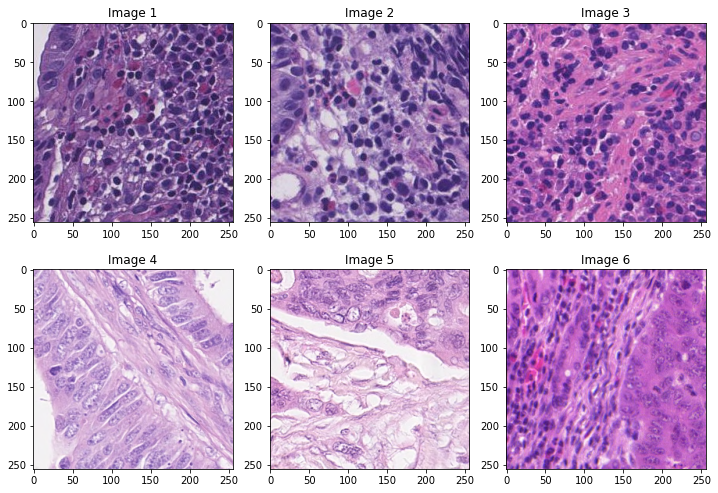

In [5]:
#Choosing 6 integers randomly to plot 6 images
res = []
for j in range(6):
    res.append(np.random.randint(0, 4981))
    
width=10
height=10
rows = 2
cols = 3
axes=[]
fig=plt.figure(figsize=(10, 7))

i = 0
for a in range(rows*cols):
    axes.append( fig.add_subplot(rows, cols, a+1) )
    subplot_title=("Image "+str(a+1))
    axes[-1].set_title(subplot_title)  
    plt.imshow(X[res[i]])
    i = i+1
fig.tight_layout()    
plt.show()

# From the images it is clear that when there is presence of T3 cell or lymphocyte cell there is a unique contrast texture
# which is not prsent in the absence of T3 cells. And also there is high correlation with respect to lymphocyte cells when we 
# extract the contrast texture from the GLCM of the image. (See question 2 part d for more info)

## iii. For each fold, plot the histogram of counts of each cell type separately (6 plots in total). How many images have counts within each of the following bins?

In [6]:
frames = [foldsdf, Y]
result = pd.concat(frames, axis=1, join='inner')

#To plot histograms for different folds

#Extracting fold 1 number of rows corresponding to value 1
result_fold1 = result.loc[result['Folds'] == 1]
#Extracting fold 2 number of rows corresponding to value 2
result_fold2 = result.loc[result['Folds'] == 2]
#Extracting fold 3 number of rows corresponding to value 3
result_fold3 = result.loc[result['Folds'] == 3]

In [7]:
#Function to plot the histogram
def plothist(x, y, title):
    
    plt.bar(x, y)
    
    # function to add value labels
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
        
    # giving title to the plot
    plt.title(title)
    
    # giving X and Y labels
    plt.xlabel("Bins")
    plt.ylabel("Counts")
      
    # visualizing the plot
    plt.show()
    
# Function to get the counts of celltype for different bin range
def imgcount(celltype, foldnum):
    dfcelltype=pd.DataFrame({'counts': [foldnum.loc[(foldnum[celltype] == 0), celltype].count(),
                                        foldnum.loc[(foldnum[celltype] >= 1) & (foldnum[celltype] <=5), celltype].count(),
                                        foldnum.loc[(foldnum[celltype] >= 6) & (foldnum[celltype] <=10), celltype].count(),
                                        foldnum.loc[(foldnum[celltype] >= 11) & (foldnum[celltype] <=20), celltype].count(),
                                        foldnum.loc[(foldnum[celltype] >= 21) & (foldnum[celltype] <=30), celltype].count(),
                                        foldnum.loc[(foldnum[celltype] >= 31) & (foldnum[celltype] <=40), celltype].count(),
                                        foldnum.loc[(foldnum[celltype] >= 41) & (foldnum[celltype] <=50), celltype].count(),
                                        foldnum.loc[(foldnum[celltype] >= 51), celltype].count()],
                            'bins':['0','1-5','6-10','11-20','21-30','31-40','41-50','>50']})
    plothist(dfcelltype['bins'],dfcelltype['counts'],celltype)

## Plots for fold 1

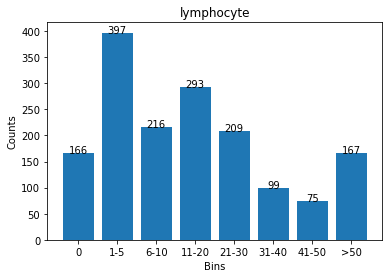

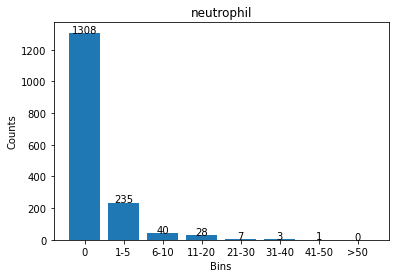

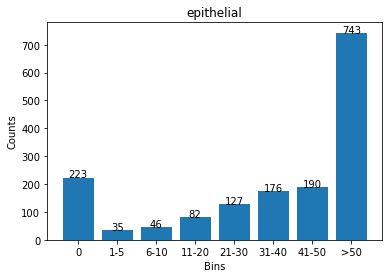

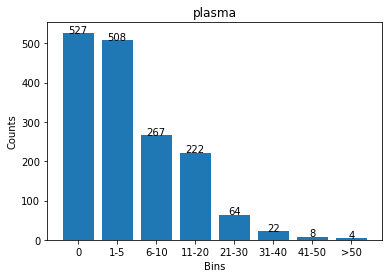

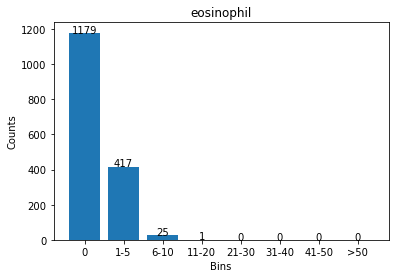

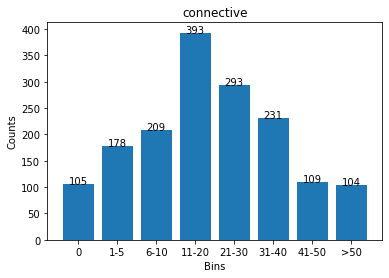

In [8]:
# Plots for fold 1
    
imgcount('lymphocyte', result_fold1)
imgcount('neutrophil', result_fold1)
imgcount('epithelial', result_fold1)
imgcount('plasma',result_fold1)
imgcount('eosinophil',result_fold1)
imgcount('connective',result_fold1)

## Plots for fold 2

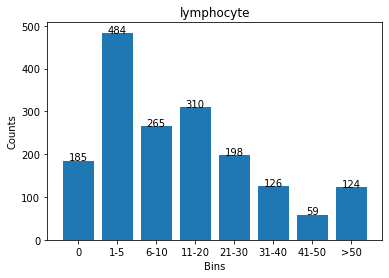

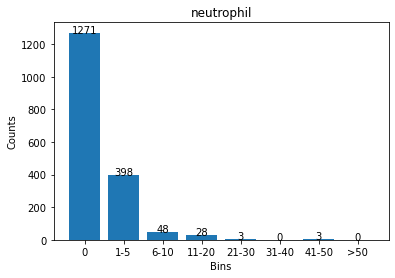

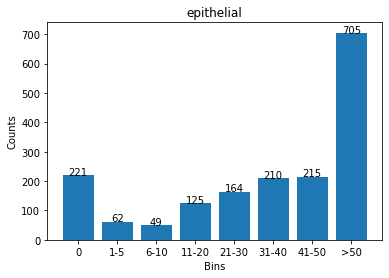

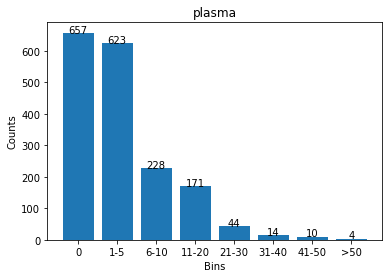

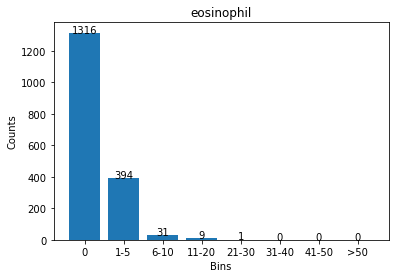

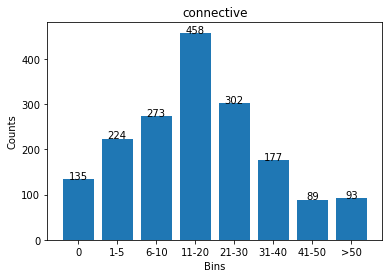

In [8]:
# Plots for fold 2
imgcount('lymphocyte', result_fold2)
imgcount('neutrophil', result_fold2)
imgcount('epithelial', result_fold2)
imgcount('plasma',result_fold2)
imgcount('eosinophil',result_fold2)
imgcount('connective',result_fold2)

## Plots for fold 3

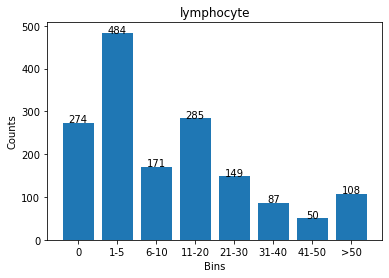

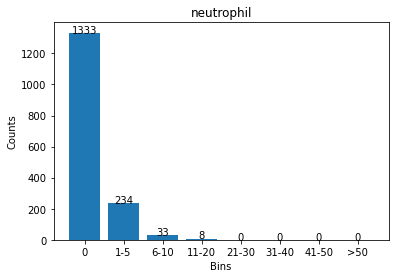

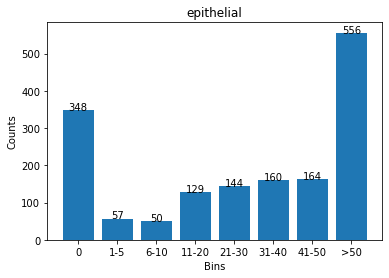

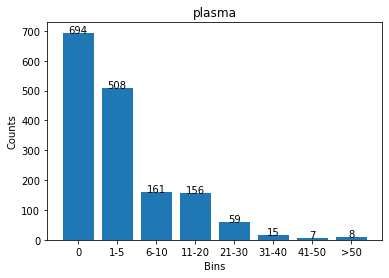

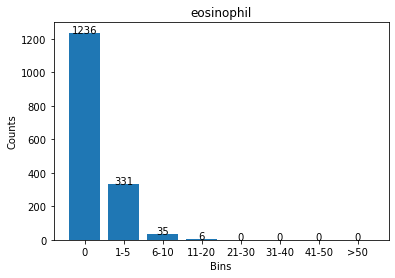

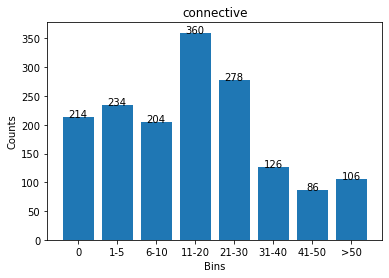

In [9]:
# Plots for fold 3
imgcount('lymphocyte', result_fold3)
imgcount('neutrophil', result_fold3)
imgcount('epithelial', result_fold3)
imgcount('plasma',result_fold3)
imgcount('eosinophil',result_fold3)
imgcount('connective',result_fold3)

## iv. Pre-processing: Convert and show a few images from RGB space to HED space and show the H-channel which should indicate cellular nuclei.

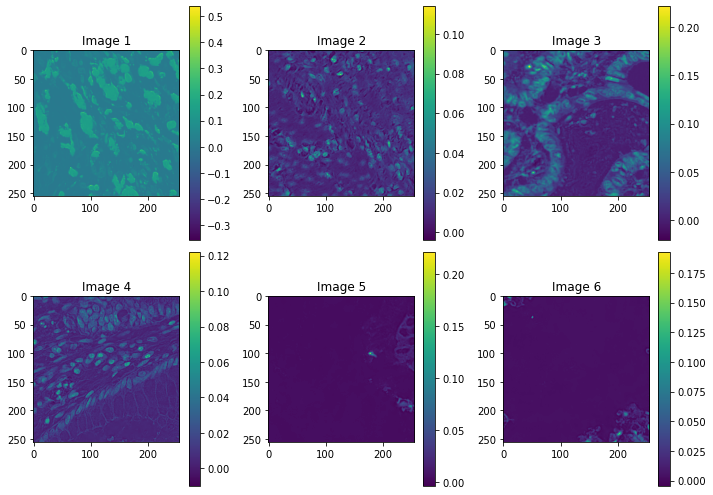

In [10]:
#Choosing 6 integers randomly to plot 6 images
res = []
for j in range(6):
    res.append(np.random.randint(0, 4981))

img_Hchnl = []
for i in res:
    I = X[i]/255.0 #read sample image and rescale pixel range in it
    I_hed = rgb2hed(I) #convert to HED
    I_h = I_hed[:,:,0];
    img_Hchnl.append(I_h)
    
width=10
height=10
rows = 2
cols = 3
axes=[]
fig=plt.figure(figsize=(10, 7))

i = 0
for a in range(rows*cols):
    axes.append( fig.add_subplot(rows, cols, a+1) )
    subplot_title=("Image "+str(a+1))
    axes[-1].set_title(subplot_title)  
    plt.imshow(img_Hchnl[i])
    plt.colorbar()
    i = i+1
    
fig.tight_layout()    
plt.show()

## v. Do a scatter plot of the average of the H-channel for each image vs. its cell count of a certain type for images in Fold-1 (6 plots in total). Do you think this feature would be useful in your regression model? Explain your reasoning.

In [11]:
# When taking the average, entropy and variance of H-channel and calculated the correlation coefficient with respect to 
# lymphocyte cells it gave a positive correlation with 05 for all the features and it definitely contributes in identifying 
# the cell count of lymphocyte (T3 cells) hence it is important (Refer question 2 part iv for more info on correlation 
# coefficient and scatter plot.)

In [12]:
X_fold1 = X[np.where(foldsdf['Folds'] == 1)]

In [13]:
lymphocyte_fold1 = pd.DataFrame(result.loc[(result['Folds'] == 1), 'lymphocyte'])
neutrophil_fold1 = pd.DataFrame(result.loc[(result['Folds'] == 1), 'neutrophil'])
epithelial_fold1 = pd.DataFrame(result.loc[(result['Folds'] == 1), 'epithelial'])
plasma_fold1 = pd.DataFrame(result.loc[(result['Folds'] == 1), 'plasma'])
eosinophil_fold1 = pd.DataFrame(result.loc[(result['Folds'] == 1), 'eosinophil'])
connective_fold1 = pd.DataFrame(result.loc[(result['Folds'] == 1), 'connective'])

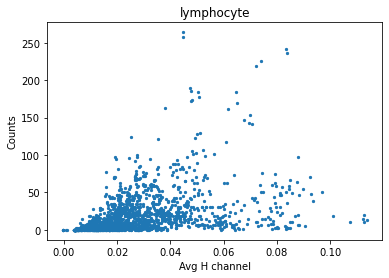

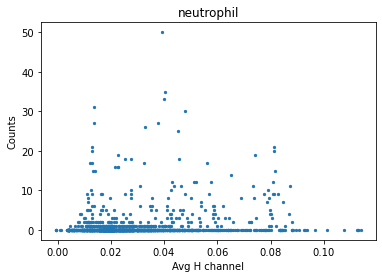

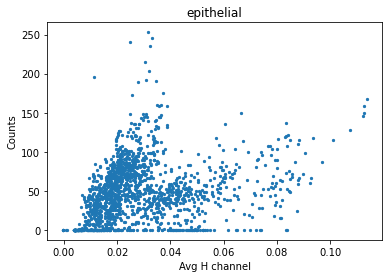

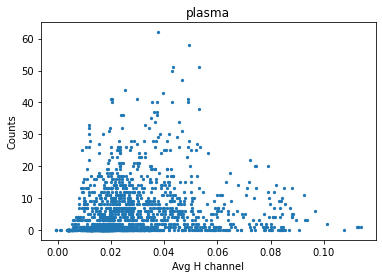

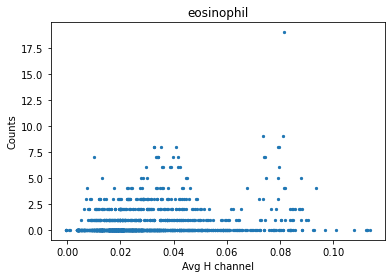

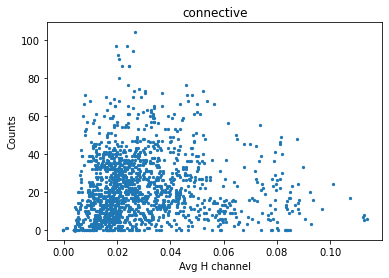

In [14]:
import cv2

X_hchnl = []
for i in X_fold1:
    I = i/255.0 #read sample image and rescale pixel range in it
    I_hed = rgb2hed(I) #convert to HED
    I_h = I_hed[:,:,0];
    X_hchnl.append(np.mean(I_h))
    
def scaterplt(x,y,title,xlab,ylab):  
    plt.scatter(x,y,s=5)
     # giving title to the plot
    plt.title(title)
    # giving X and Y labels
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.show()

scaterplt(X_hchnl,lymphocyte_fold1,'lymphocyte',"Avg H channel","Counts")
scaterplt(X_hchnl,neutrophil_fold1,'neutrophil',"Avg H channel","Counts")
scaterplt(X_hchnl,epithelial_fold1,'epithelial',"Avg H channel","Counts")
scaterplt(X_hchnl,plasma_fold1,'plasma',"Avg H channel","Counts")
scaterplt(X_hchnl,eosinophil_fold1,'eosinophil',"Avg H channel","Counts")
scaterplt(X_hchnl,connective_fold1,'connective',"Avg H channel","Counts")

## vi. What performance metrics can you use for this problem? Which one will be the best performance metric for this problem? Please give reasoning

In [15]:
# Mean Squared Error, Mean Absolute Error, and Mean Absolute Percentage Error are the best metric when we are predicting a 
# numerical value. The only issue with MSE is that the order of loss is more than that of the data. As our data is of order 1 
# and the loss function, MSE has an order of 2. So we cannot directly correlate data with the error. Hence, we take the root of 
# the MSE — which is the Root Mean Squared Error. 

# Actually speaking Huber loss combines the best properties of MSE and MAE (Mean Absolute Error). It is quadratic for smaller 
# errors and is linear otherwise. Huber loss is less sensitive or more robust to outliers in data than the MSE. It’s also 
# differentiable at 0. It’s basically an absolute error, which becomes quadratic when the error is small. How small that error 
# has to be to make it quadratic depends on a hyperparameter, 𝛿 (delta), which can be tuned. Huber loss approaches MAE when 
# 𝛿 ~ 0 and MSE when 𝛿 ~ ∞ (large numbers.)

## Question No. 2: (Feature Extraction and Classical Regression)
## For the following questions, use only T3 type of cells as the output prediction variable.
## i. Extract features from a given image. Specifically, calculate the: 
## a. average of the “H”, red, green and blue channels
## b. variance of the “H”, red, green and blue channels
## c. entropy of the “H”, red, green and blue channels

In [16]:
# Initialising List to store average of each channel
avg_h = [];avg_r = [];avg_g = [];avg_b = [];
# Initialising List to store variance of each channel
var_h = [];var_r = [];var_g = [];var_b = [];
# Initialising List to store entropy of each channel
entr_h = [];entr_r = [];entr_g = [];entr_b = [];

for i in X:
    I = i/255.0 #read sample image and rescale pixel range in it
    I_r = I[:,:,0]
    I_g = I[:,:,1]
    I_b = I[:,:,2]
    avg_r.append(np.mean(I_r))
    avg_g.append(np.mean(I_g))
    avg_b.append(np.mean(I_b))
    var_r.append(np.mean(I_r))
    var_g.append(np.mean(I_g))
    var_b.append(np.mean(I_b))
    entr_r.append(skimage.measure.shannon_entropy(I_r))
    entr_g.append(skimage.measure.shannon_entropy(I_g))
    entr_b.append(skimage.measure.shannon_entropy(I_b))
    I_hed = rgb2hed(I) #convert to HED
    I_h = I_hed[:,:,0]
    avg_h.append(np.mean(I_h))
    var_h.append(np.var(I_h))
    entr_h.append(skimage.measure.shannon_entropy(I_h))

In [17]:
# from sklearn.decomposition import PCA
# Xd = X.reshape(4981,256*256*3)
# pca = PCA(n_components=6)
# principalComponents = pca.fit_transform(Xd)
# print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

In [18]:
# principal_Df = pd.DataFrame(data = principalComponents
#              , columns = ['pc1','pc2','pc3','pc4','pc5','pc6'])

## d. Any other features that you think can be useful for this work. Describe your reasoning for using these features.

In [19]:
# GLCM of an image has been calculated and various features like contrast, dissimilarity, homogeneity etc are extracted as 
# shown below. I have made use of 18 feature sin total, no matter if they are positively correlated or negatively correlated 
# for the task of regression. These features have improves the R-2 score and also decreased rmse substantially. 

In [20]:
# the entire feature calculation using GLCM is picked up from the internet source : https://github.com/Madhu87/Feature-Extraction-using-GLCM/blob/main/Feature%20Extraction%20from%20single%20Image.ipynb
df_glcm = pd.DataFrame(columns=['Contrast Feature','Dissimilarity Feature','Homogeneity Feature','Energy Feature','Correlation Feature','ASM Feature'])

In [21]:
from skimage.feature import greycomatrix, greycoprops
from skimage import io, color, img_as_ubyte

matrix1 = []

for i in range(0,len(X)):
    gray = color.rgb2gray(X[i])
    image = img_as_ubyte(gray)# Becomes 8-bit unsigned integer

#This step is similar to data compression, because the 8-bit image contains 256 gray levels, which will cause the calculation 
#of the gray level co-occurrence matrix to be too large, so it is compressed into 16 levels and the gray levels are divided
    bins = np.array([0, 16, 32, 48, 64, 80, 96, 112, 128, 144, 160, 176, 192, 208, 224, 240, 255]) #16-bit
    
    inds = np.digitize(image, bins)#Returns a matrix with the same size as the image, but the matrix element represents the 
                            #interval position of the element in the image in the bins, less than 0 is 0, 0-16 is 1, and so on

    max_value = inds.max()+1
    matrix_coocurrence = greycomatrix(inds, #Numpy matrix for co-occurrence matrix calculation
                                  [1],#Step
                                  [0, np.pi/4, np.pi/2, 3*np.pi/4],#Direction angle
                                  levels=max_value, #Co-occurrence matrix order
                                  normed=False, symmetric=False)
#P[i,j,d,theta] returns a four-dimensional matrix, each dimension represents a different meaning
    matrix1.append(matrix_coocurrence)

In [22]:
CF =[]
DF =[]
HF =[]
EF =[]
COR = []
ASM = []

def contrast_feature(matrix):
    contrast = greycoprops(matrix,'contrast')
    return  list(contrast)

def dissimilarity_feature(matrix):
    dissimilarity = greycoprops(matrix,'dissimilarity')
    return list(dissimilarity)

def homogeneity_feature(matrix):
    homogeneity = greycoprops(matrix,'homogeneity')
    return  list(homogeneity)

def energy_feature(matrix):
    energy = greycoprops(matrix,'energy')
    return list(energy)

def correlation_feature(matrix):
    correlation = greycoprops(matrix,'correlation')
    return list(correlation)

def asm_feature(matrix):
    asm = greycoprops(matrix,'ASM')
    return list(asm)

for i in range(0,len(matrix1)):    
    CF.append(np.mean(contrast_feature(matrix1[i])))
    DF.append(np.mean(dissimilarity_feature(matrix1[i])))
    HF.append(np.mean(homogeneity_feature(matrix1[i])))
    EF.append(np.mean(energy_feature(matrix1[i])))
    COR.append(np.mean(correlation_feature(matrix1[i])))
    ASM.append(np.mean(asm_feature(matrix1[i])))

In [23]:
Features = [CF,DF,HF,EF,COR,ASM]
for i,j in zip(df_glcm.columns,Features):
    df_glcm[i] = j
    
df_glcm

,Contrast Feature,Dissimilarity Feature,Homogeneity Feature,Energy Feature,Correlation Feature,ASM Feature
0,2.528180,1.087276,0.583743,0.167944,0.804375,0.028280
1,2.219308,0.982998,0.618999,0.197424,0.850833,0.039037
2,2.419281,1.026714,0.610281,0.206890,0.848762,0.042838
3,1.916849,0.886287,0.650534,0.238589,0.883200,0.056983
4,2.610190,1.121508,0.568992,0.161657,0.767879,0.026189
...,...,...,...,...,...,...
4976,2.387779,1.040661,0.597413,0.181769,0.781465,0.033117
4977,1.816710,0.833668,0.668635,0.209446,0.915132,0.043946
4978,1.394229,0.732366,0.695338,0.257109,0.945236,0.066154
4979,2.241482,0.924871,0.649674,0.222193,0.912125,0.049421


In [24]:
# Instead of predicting the count of the celltype directly I am trying to predict it's log value since it's more efficient and
# easier for the model to learn in log scale.

In [25]:
Y['lymphocytelog'] = np.log(Y['lymphocyte'] + 1)

In [26]:
features = pd.DataFrame({'avg_r': avg_r,'avg_g':avg_g,'avg_b':avg_b,'avg_h':avg_h,
                      'var_r': var_r,'var_g':var_g,'var_b':var_b,'var_h':var_h,
                      'entr_r': entr_r,'entr_g':entr_g,'entr_b':entr_b,'entr_h':entr_h})


features = pd.concat([features, df_glcm,Y['lymphocytelog']], axis=1, join='inner')
#features = pd.concat([features, df_glcm,Y['lymphocyte']], axis=1, join='inner')
features

,avg_r,avg_g,avg_b,avg_h,var_r,var_g,var_b,var_h,entr_r,entr_g,entr_b,entr_h,Contrast Feature,Dissimilarity Feature,Homogeneity Feature,Energy Feature,Correlation Feature,ASM Feature,lymphocytelog
0,0.775287,0.666784,0.864555,0.028605,0.775287,0.666784,0.864555,0.000512,7.063311,7.343395,6.344929,15.118937,2.528180,1.087276,0.583743,0.167944,0.804375,0.028280,0.000000
1,0.794013,0.691662,0.873952,0.026076,0.794013,0.691662,0.873952,0.000533,6.976390,7.268564,6.295099,14.800732,2.219308,0.982998,0.618999,0.197424,0.850833,0.039037,0.693147
2,0.773916,0.667299,0.862993,0.029113,0.773916,0.667299,0.862993,0.000586,6.973113,7.158988,6.306477,14.575099,2.419281,1.026714,0.610281,0.206890,0.848762,0.042838,1.386294
3,0.807823,0.708420,0.878354,0.023963,0.807823,0.708420,0.878354,0.000505,6.846146,7.157774,6.219650,14.493204,1.916849,0.886287,0.650534,0.238589,0.883200,0.056983,0.000000
4,0.738723,0.605632,0.839980,0.033358,0.738723,0.605632,0.839980,0.000476,7.107354,7.331547,6.480956,15.173962,2.610190,1.121508,0.568992,0.161657,0.767879,0.026189,2.079442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4976,0.833618,0.676521,0.851176,0.017122,0.833618,0.676521,0.851176,0.000275,6.744447,7.253116,6.481390,14.971538,2.387779,1.040661,0.597413,0.181769,0.781465,0.033117,2.890372
4977,0.809485,0.649724,0.820723,0.020583,0.809485,0.649724,0.820723,0.000568,6.802577,7.270968,6.618228,14.522170,1.816710,0.833668,0.668635,0.209446,0.915132,0.043946,2.302585
4978,0.792709,0.653538,0.819992,0.023932,0.792709,0.653538,0.819992,0.000645,6.758527,7.132989,6.540363,14.114807,1.394229,0.732366,0.695338,0.257109,0.945236,0.066154,0.693147
4979,0.793137,0.646565,0.818171,0.023750,0.793137,0.646565,0.818171,0.000663,6.750199,7.182015,6.550184,14.124510,2.241482,0.924871,0.649674,0.222193,0.912125,0.049421,2.197225


In [27]:
correlation = features.corr()
for col in correlation:
    if(col != 'lymphocytelog'):
        print('The correlation between ' + str(col) +' vs lymphocyte is: ' + str(correlation.loc[col, 'lymphocytelog']))

The correlation between avg_r vs lymphocyte is: -0.511098168997361
The correlation between avg_g vs lymphocyte is: -0.573641104590972
The correlation between avg_b vs lymphocyte is: -0.540578645763312
The correlation between avg_h vs lymphocyte is: 0.4471772573099465
The correlation between var_r vs lymphocyte is: -0.511098168997361
The correlation between var_g vs lymphocyte is: -0.573641104590972
The correlation between var_b vs lymphocyte is: -0.540578645763312
The correlation between var_h vs lymphocyte is: 0.5518804757434518
The correlation between entr_r vs lymphocyte is: 0.5763900091872207
The correlation between entr_g vs lymphocyte is: 0.463780897490533
The correlation between entr_b vs lymphocyte is: 0.5404872077253313
The correlation between entr_h vs lymphocyte is: 0.4099244243542206
The correlation between Contrast Feature vs lymphocyte is: 0.28639434169364664
The correlation between Dissimilarity Feature vs lymphocyte is: 0.3335783660746422
The correlation between Homogen

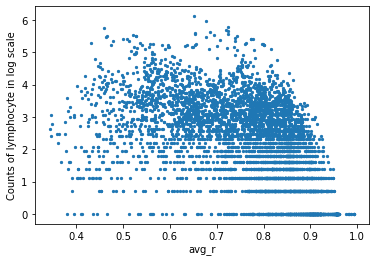

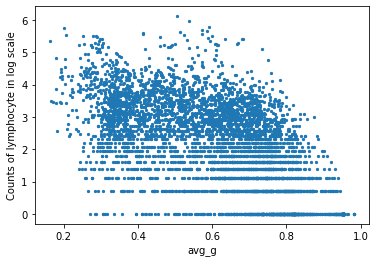

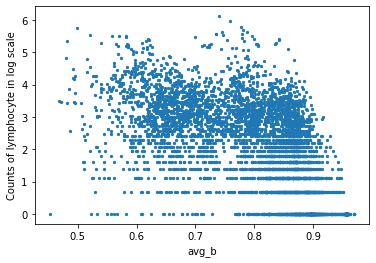

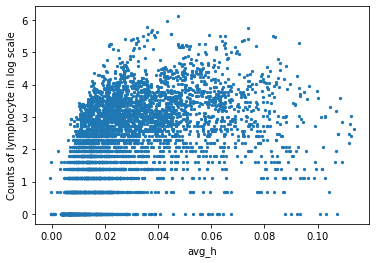

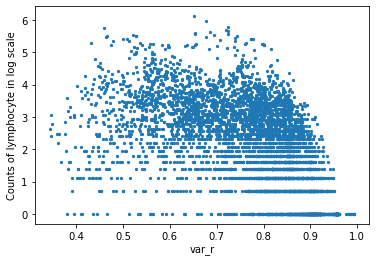

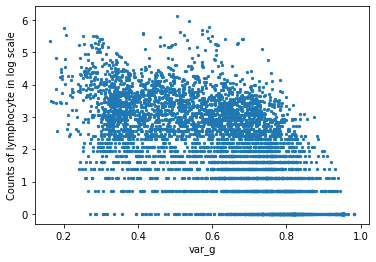

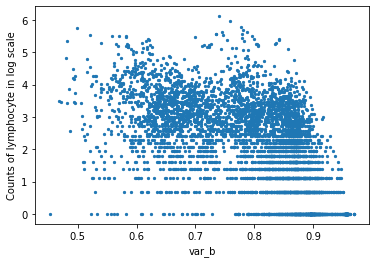

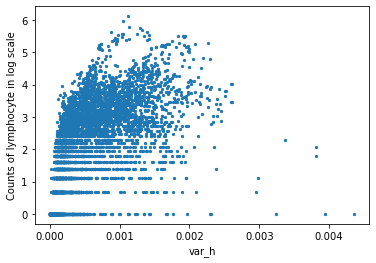

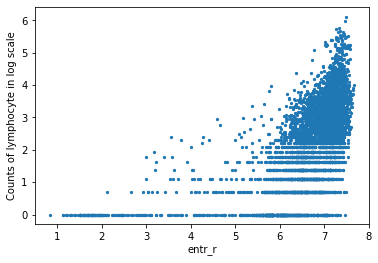

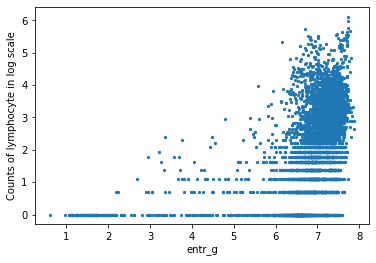

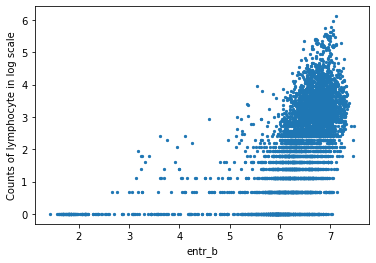

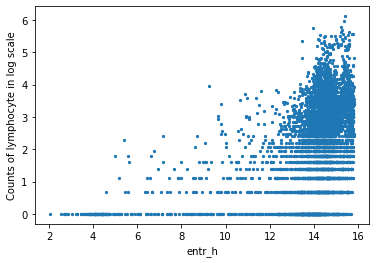

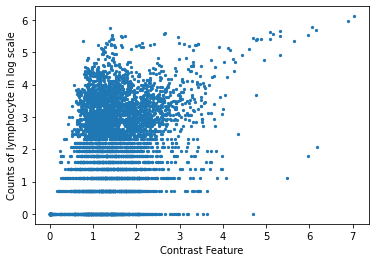

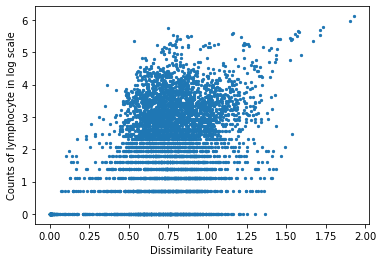

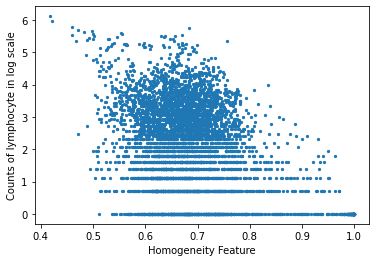

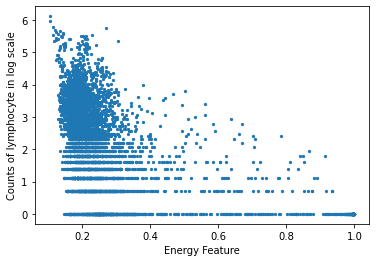

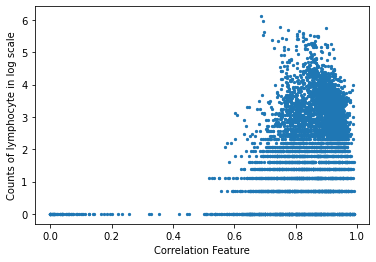

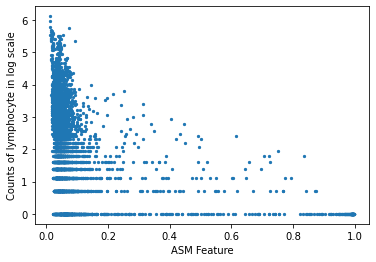

In [28]:
for col in features:
    if (col != 'lymphocytelog'):
        scaterplt(features[col],features['lymphocytelog'],'',col,"Counts of lymphocyte in log scale")

## ii. Try the following regression models with the features used in part-I. Plot the scatter plot between true and predicted counts for each type of regression model for the test data. Also, report your prediction performance in terms of RMSE, Pearson Correlation Coefficient, Spearman Correlation Coefficient and R2 score on the test data.
## a. Ordinary Least Squares (OLS) regression


In [29]:
features = pd.concat([features,foldsdf],  axis=1, join='inner')
features

,avg_r,avg_g,avg_b,avg_h,var_r,var_g,var_b,var_h,entr_r,entr_g,entr_b,entr_h,Contrast Feature,Dissimilarity Feature,Homogeneity Feature,Energy Feature,Correlation Feature,ASM Feature,lymphocytelog,Folds
0,0.775287,0.666784,0.864555,0.028605,0.775287,0.666784,0.864555,0.000512,7.063311,7.343395,6.344929,15.118937,2.528180,1.087276,0.583743,0.167944,0.804375,0.028280,0.000000,3.0
1,0.794013,0.691662,0.873952,0.026076,0.794013,0.691662,0.873952,0.000533,6.976390,7.268564,6.295099,14.800732,2.219308,0.982998,0.618999,0.197424,0.850833,0.039037,0.693147,3.0
2,0.773916,0.667299,0.862993,0.029113,0.773916,0.667299,0.862993,0.000586,6.973113,7.158988,6.306477,14.575099,2.419281,1.026714,0.610281,0.206890,0.848762,0.042838,1.386294,3.0
3,0.807823,0.708420,0.878354,0.023963,0.807823,0.708420,0.878354,0.000505,6.846146,7.157774,6.219650,14.493204,1.916849,0.886287,0.650534,0.238589,0.883200,0.056983,0.000000,3.0
4,0.738723,0.605632,0.839980,0.033358,0.738723,0.605632,0.839980,0.000476,7.107354,7.331547,6.480956,15.173962,2.610190,1.121508,0.568992,0.161657,0.767879,0.026189,2.079442,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4976,0.833618,0.676521,0.851176,0.017122,0.833618,0.676521,0.851176,0.000275,6.744447,7.253116,6.481390,14.971538,2.387779,1.040661,0.597413,0.181769,0.781465,0.033117,2.890372,3.0
4977,0.809485,0.649724,0.820723,0.020583,0.809485,0.649724,0.820723,0.000568,6.802577,7.270968,6.618228,14.522170,1.816710,0.833668,0.668635,0.209446,0.915132,0.043946,2.302585,3.0
4978,0.792709,0.653538,0.819992,0.023932,0.792709,0.653538,0.819992,0.000645,6.758527,7.132989,6.540363,14.114807,1.394229,0.732366,0.695338,0.257109,0.945236,0.066154,0.693147,3.0
4979,0.793137,0.646565,0.818171,0.023750,0.793137,0.646565,0.818171,0.000663,6.750199,7.182015,6.550184,14.124510,2.241482,0.924871,0.649674,0.222193,0.912125,0.049421,2.197225,3.0


In [30]:
#Choosing folds 1 as training data, 2 as validation data and 3 as testdata
traindata = features.loc[(features['Folds'] == 1)]
validdata = features.loc[(features['Folds'] == 2)]
traindata = pd.concat([traindata,validdata])
testdata = features.loc[(features['Folds'] == 3)]

In [31]:
#Segregating into training data and testing data.
Xtraindata = traindata.iloc[:,:18]
Ytraindata = traindata.loc[:,'lymphocytelog']
Xtestdata = testdata.iloc[:,:18]
Ytestdata = testdata.loc[:,'lymphocytelog']

In [32]:
#Scaling the data before applying the model
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(Xtraindata)
X_test = scaler.transform(Xtestdata)

In [33]:
import statsmodels.api as sm
 
# adding the constant term
x = sm.add_constant(X_train)
 
# performing the regression
# and fitting the model
result = sm.OLS(Ytraindata, x).fit()
 
# printing the summary table
print(result.summary())
#result.params

                            OLS Regression Results                            
Dep. Variable:          lymphocytelog   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     283.7
Date:                Wed, 23 Mar 2022   Prob (F-statistic):               0.00
Time:                        11:26:59   Log-Likelihood:                -4250.1
No. Observations:                3373   AIC:                             8532.
Df Residuals:                    3357   BIC:                             8630.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2978      0.015    156.059      0.0

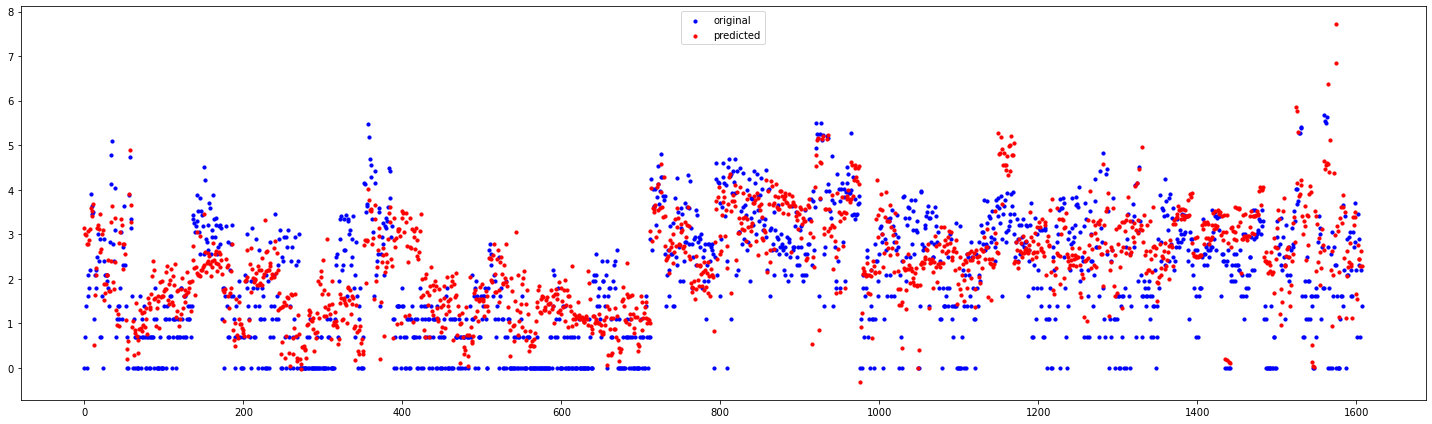

In [34]:
xt = sm.add_constant(X_test)
yhat = result.predict(xt)

figu=plt.figure(figsize=(20, 6))
z = list(range(len(yhat)))
#We can visualize them in a plot to check the difference visually.

plt.scatter(z, Ytestdata, color="blue", label="original",s = 10)
plt.scatter(z, yhat, color="red", label="predicted", s= 10)
plt.legend(loc = 'upper center')
figu.tight_layout()
plt.show() 

## Scatter plot between true and predicted counts for lymphocyte

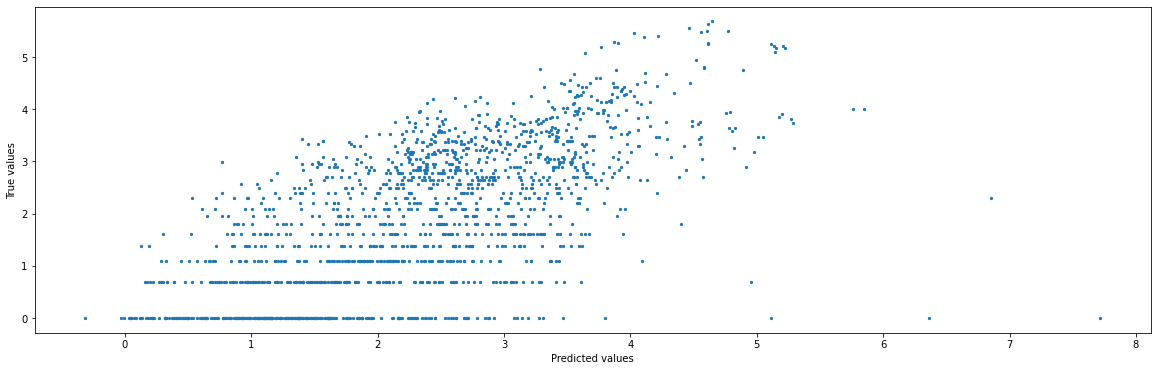

In [35]:
fig=plt.figure(figsize=(20, 6))
scaterplt(yhat,Ytestdata,'',"Predicted values","True values")
fig.tight_layout()
plt.show()

## Performance Metrics - R2- score, RMSE, Pearson Correlation Coefficient and Spearman coefficient

In [36]:
from statsmodels.tools.eval_measures import rmse
from scipy.stats import spearmanr
import sklearn.metrics as metrics
print('rmse: '+ str(rmse(Ytestdata, yhat)))
print('Pearson Correlation Coefficient: ', np.corrcoef(Ytestdata, yhat)[0,1])
rho, p = spearmanr(Ytestdata, yhat)
print("Spearman Correlation Coefficient: ", rho)
print("R2-score: ", metrics.r2_score(Ytestdata,yhat))

rmse: 1.1029275184206335
Pearson Correlation Coefficient:  0.6607679143848495
Spearman Correlation Coefficient:  0.6652684466273291
R2-score:  0.34783945166766705


## b. Support Vector Regression

In [37]:
from sklearn.svm import SVR

regressor = SVR(kernel='rbf', C = 10, gamma ='auto', epsilon=0.2)
regressor.fit(X_train,Ytraindata)

SVR(C=10, epsilon=0.2, gamma='auto')

In [38]:
y_pred = regressor.predict(X_test)

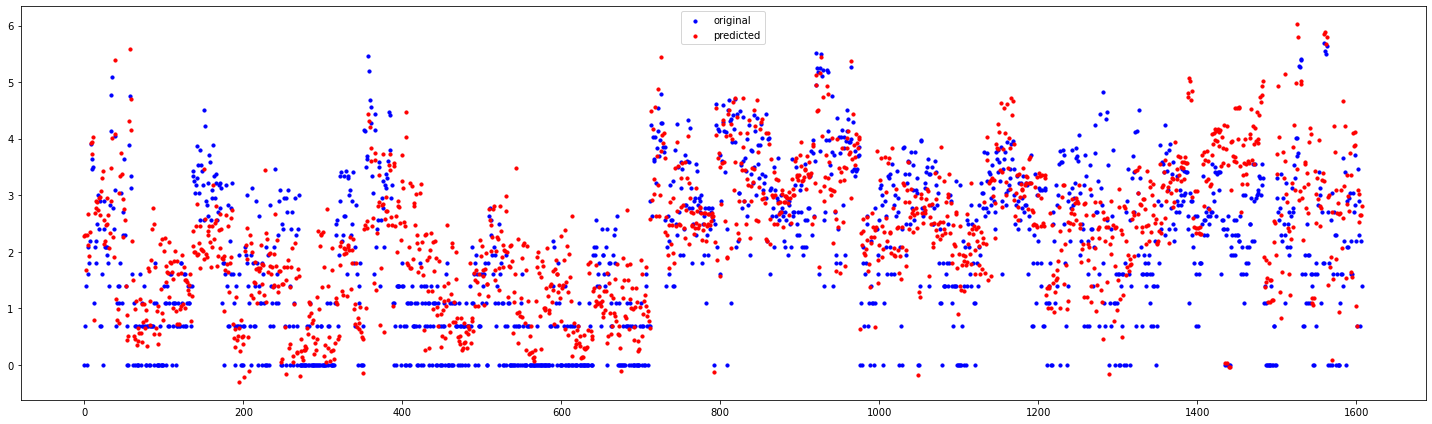

In [39]:
fig=plt.figure(figsize=(20, 6))
z = list(range(len(y_pred)))
#We can visualize them in a plot to check the difference visually.

plt.scatter(z, Ytestdata, color="blue", label="original",s = 10)
plt.scatter(z, y_pred, color="red", label="predicted", s= 10)
plt.legend(loc = 'upper center')
fig.tight_layout()
plt.show() 

## Scatter plot between true and predicted counts for lymphocyte

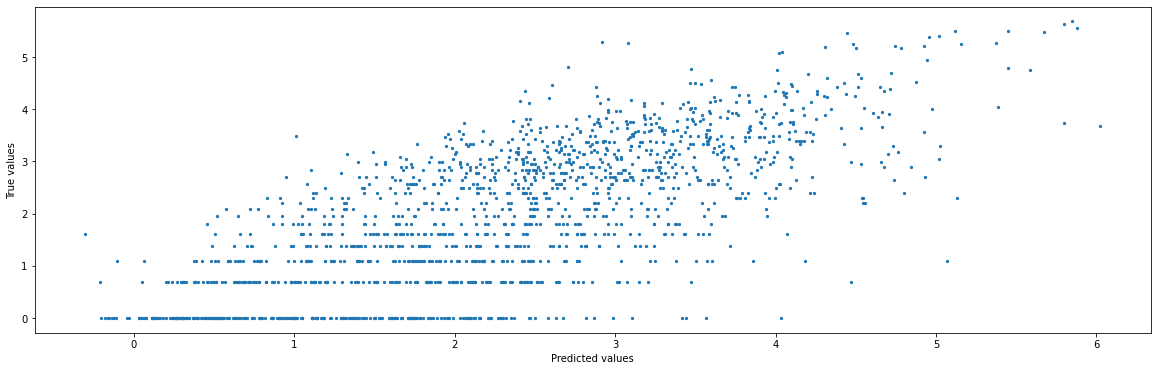

In [40]:
fig=plt.figure(figsize=(20, 6))
scaterplt(y_pred,Ytestdata,'',"Predicted values","True values")
fig.tight_layout()
plt.show()

## Performance Metrics - R2- score, RMSE, Pearson Correlation Coefficient and Spearman coefficient

In [41]:
from statsmodels.tools.eval_measures import rmse
from scipy.stats import spearmanr
import sklearn.metrics as metrics
print('rmse: '+ str(rmse(Ytestdata, y_pred)))
print('Pearson Correlation Coefficient: ', np.corrcoef(Ytestdata, y_pred)[0,1])
rho, p = spearmanr(Ytestdata, y_pred)
print("Spearman Correlation Coefficient: ", rho)
print("R2-score: ", metrics.r2_score(Ytestdata,y_pred))

rmse: 0.9946917382451674
Pearson Correlation Coefficient:  0.7346300408080599
Spearman Correlation Coefficient:  0.7304615288988863
R2-score:  0.46955837189598726


## Question No. 3 (Using Convolutional Neural Networks)
## a. Use a convolutional neural network (in Keras or PyTorch) to solve this problem in much the same was as in part (ii) of Question (2). You are to develop an architecture of the neural network that takes an image directly as input and produces a count as the output corresponding to T3 cells. You are free to choose any network structure as long as you can show that it gives good performance. Report your results on the test examples by plotting the scatter plot between true and predicted counts on the test data. Also, report your results in terms of RMSE, Pearson Correlation Coefficient, Spearman Correlation Coefficient and R2 score. You will be evaluated on the design of your machine learning model and final performance metrics. Try to get the best test performance you can. Please include convergence plots in your submission showing how does loss change over training epochs.

## Resizing and scaling all images

In [43]:
from skimage.transform import resize
import cv2

Xscale = X/255
Xnew=[]

for i in range(len(Xscale)):

    im=cv2.resize(Xscale[i],(120,120),interpolation = cv2.INTER_AREA)

    Xnew.append(im)
    
Xnew = np.asarray(Xnew)

## Taking first two folds for training and validation, Fold 3 for testing

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(Xnew[:3373], Y['lymphocyte'][:3373], test_size=0.3, random_state=42)
X_test = Xnew[3373:]
y_test = Y['lymphocyte'][3373:]

## CNN model architecture

In [48]:
import tensorflow as tf

tf.random.set_seed(0)

def model_cnn(X_train,y_train,X_val,y_val):
    tf.random.set_seed(0)
    inputs = tf.keras.Input(shape=(120, 120, 3))
    x = tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu')(inputs)
    x = tf.keras.layers.MaxPool2D()(x)
    x = tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(x)
    x = tf.keras.layers.MaxPool2D()(x)
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    
    x = tf.keras.layers.Dense(64, activation='relu')(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(64, activation='relu')(x)
    outputs = tf.keras.layers.Dense(1, activation='linear')(x)
    
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    
    model.compile(
        optimizer=optimizer,
        loss='mse',
        metrics=['accuracy']
    )
    
    history = model.fit(
        X_train,y_train,
        validation_data=(X_val,y_val),
        batch_size=20,
        epochs=50
    #     callbacks=[
    #         tf.keras.callbacks.EarlyStopping(
    #             monitor='val_loss',
    #             patience=5,
    #             restore_best_weights=True
    #         )
    #     ]
    )
    return model, history


## Performance Metrics - R2- score, RMSE, Pearson Correlation Coefficient and Spearman coefficient 

In [49]:
from sklearn.metrics import r2_score

model,history = model_cnn(X_train,y_train,X_val,y_val)
predicted_count = model.predict(X_test).reshape(1608,)
true_count = y_test
# print(predicted_count)
# print(true_count)

Epoch 1/50
119/119 [==============================] - 12s 97ms/step - loss: 965.6921 - accuracy: 0.0873 - val_loss: 703.1660 - val_accuracy: 0.0909
Epoch 2/50
119/119 [==============================] - 11s 89ms/step - loss: 793.3293 - accuracy: 0.0856 - val_loss: 695.5525 - val_accuracy: 0.0909
Epoch 3/50
119/119 [==============================] - 11s 91ms/step - loss: 807.6170 - accuracy: 0.0856 - val_loss: 798.4137 - val_accuracy: 0.0909
Epoch 4/50
119/119 [==============================] - 11s 90ms/step - loss: 786.4066 - accuracy: 0.0856 - val_loss: 611.9366 - val_accuracy: 0.0909
Epoch 5/50
119/119 [==============================] - 11s 92ms/step - loss: 736.0168 - accuracy: 0.0856 - val_loss: 693.7322 - val_accuracy: 0.0909
Epoch 6/50
119/119 [==============================] - 10s 87ms/step - loss: 727.1907 - accuracy: 0.0856 - val_loss: 602.3134 - val_accuracy: 0.0909
Epoch 7/50
119/119 [==============================] - 10s 85ms/step - loss: 664.3320 - accuracy: 0.1046 - val_lo

In [50]:
mse,_ = model.evaluate(X_test, y_test)
print("     Test RMSE: {:.5f}".format(np.sqrt(mse)))

r2 = r2_score(true_count, predicted_count)
print("Test R^2 Score: {:.5f}".format(r2))

print('Pearson Correlation Coefficient: ', np.corrcoef(true_count, predicted_count)[0,1])
rho, p = spearmanr(true_count, predicted_count)
print("Spearman Correlation Coefficient: ", rho)

51/51 [==============================] - 2s 30ms/step - loss: 310.2216 - accuracy: 0.0479
     Test RMSE: 17.61311
Test R^2 Score: 0.68914
Pearson Correlation Coefficient:  0.8350658151500395
Spearman Correlation Coefficient:  0.7908693206692172


## Plots for training accuracy vs validation accuracy and training loss vs validation loss

C:\Users\harsh\AppData\Local\Temp/ipykernel_9652/3112450188.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax[0].plot(epochs, accuracy, 'bo', label='Training accuracy', color= 'g')
C:\Users\harsh\AppData\Local\Temp/ipykernel_9652/3112450188.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy', color = 'r')
C:\Users\harsh\AppData\Local\Temp/ipykernel_9652/3112450188.py:21: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax[1].plot(epochs, loss_values, 'bo', label='Training loss', color='g')
C:\Users\harsh\AppData\Local\Temp/ipykernel_9652/3112450188.py:22: UserWarning: co

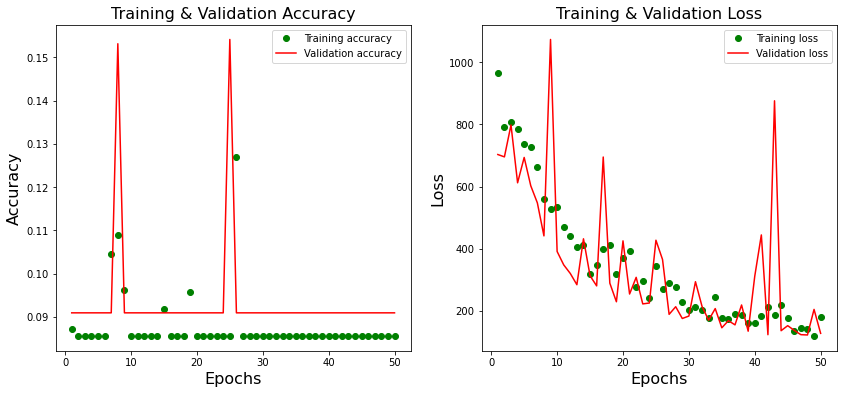

In [51]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
  
epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#
# Plot the model accuracy vs Epochs
#
ax[0].plot(epochs, accuracy, 'bo', label='Training accuracy', color= 'g')
ax[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy', color = 'r')
ax[0].set_title('Training & Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values, 'bo', label='Training loss', color='g')
ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss', color = 'r')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()

## Scatter plot between true and predicted counts for lymphocyte

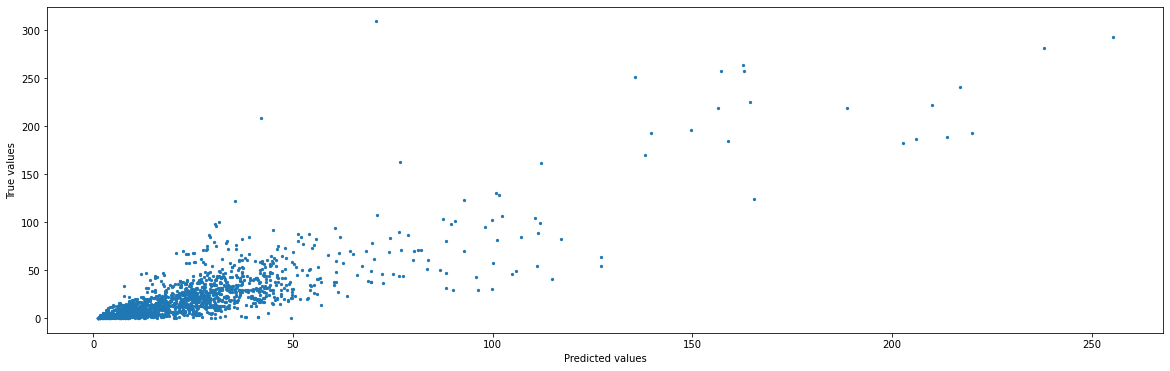

In [52]:
fig=plt.figure(figsize=(20, 6))
scaterplt(predicted_count,true_count,'',"Predicted values","True values")
fig.tight_layout()
plt.show()

## b. Use three fold cross validation with your optimal network architecture to predict the counts of T3 cells. Do 3-fold cross-validation with the given folds and report the results for each test fold in the form of separate predicted-vs-actual count scatter plots (3 folds so 3 plots in total) using your model and report your results in terms of RMSE, Pearson Correlation Coefficient, Spearman Correlation Coefficient and R2 score for each fold separately.

## Fold 1

In [ ]:
#Fold 1

X_train_fold1, X_val_fold1, y_train_fold1, y_val_fold1 = train_test_split(Xnew[:3373], Y['lymphocyte'][:3373], test_size=0.3, random_state=42)
X_test_fold1 = Xnew[3373:]
y_test_fold1 = Y['lymphocyte'][3373:]
model_fold1,_ = model_cnn(X_train_fold1,y_train_fold1,X_val_fold1,y_val_fold1)
predicted_count_fold1 = model_fold1.predict(X_test_fold1).reshape(1608,)
true_count_fold1 = y_test_fold1
print(predicted_count_fold1)
print(true_count_fold1)

In [ ]:
mse_fold1,_ = model_fold1.evaluate(X_test_fold1, y_test_fold1)
print("     Test RMSE: {:.5f}".format(np.sqrt(mse_fold1)))

r2_fold1 = r2_score(true_count_fold1, predicted_count_fold1)
print("Test R^2 Score: {:.5f}".format(r2_fold1))

print('Pearson Correlation Coefficient: ', np.corrcoef(true_count_fold1, predicted_count_fold1)[0,1])
rho_fold1, p = spearmanr(true_count_fold1, predicted_count_fold1)
print("Spearman Correlation Coefficient: ", rho_fold1)

fig=plt.figure(figsize=(20, 6))
scaterplt(predicted_count_fold1,true_count_fold1,'',"Predicted values","True values")
fig.tight_layout()
plt.show()

## Fold 2

In [ ]:
#Fold 2

fold2_X = np.append(Xnew[:1622],Xnew[3373:], axis = 0)
fold2_Y = pd.concat( [Y['lymphocyte'][:1622], Y['lymphocyte'][3373:]])
X_train_fold2, X_val_fold2, y_train_fold2, y_val_fold2 = train_test_split(fold2_X, fold2_Y, test_size=0.3, random_state=42)
X_test_fold2 = Xnew[1622:3373]
y_test_fold2 = Y['lymphocyte'][1622:3373]

model_fold2,_ = model_cnn(X_train_fold2,y_train_fold2,X_val_fold2,y_val_fold2)
predicted_count_fold2 = model_fold2.predict(X_test_fold2).reshape(1751,)
true_count_fold2 = y_test_fold2
print(predicted_count_fold2)
print(true_count_fold2)

In [ ]:
mse_fold2,_ = model_fold2.evaluate(X_test_fold2, y_test_fold2)
print("     Test RMSE: {:.5f}".format(np.sqrt(mse_fold2)))

r2_fold2 = r2_score(true_count_fold2, predicted_count_fold2)
print("Test R^2 Score: {:.5f}".format(r2_fold2))

print('Pearson Correlation Coefficient: ', np.corrcoef(true_count_fold2, predicted_count_fold2)[0,1])
rho_fold2, p = spearmanr(true_count_fold2, predicted_count_fold2)
print("Spearman Correlation Coefficient: ", rho_fold2)

fig=plt.figure(figsize=(20, 6))
scaterplt(predicted_count_fold2,true_count_fold2,'',"Predicted values","True values")
fig.tight_layout()
plt.show()

## Fold 3

In [ ]:
#Fold 3

X_train_fold3, X_val_fold3, y_train_fold3, y_val_fold3 = train_test_split(Xnew[1622:], Y['lymphocyte'][1622:], test_size=0.3, random_state=42)
X_test_fold3 = Xnew[:1622]
y_test_fold3 = Y['lymphocyte'][:1622]

model_fold3,_ = model_cnn(X_train_fold3,y_train_fold3,X_val_fold3,y_val_fold3)
predicted_count_fold3 = model_fold3.predict(X_test_fold3).reshape(1622,)
true_count_fold3 = y_test_fold3
print(predicted_count_fold3)
print(true_count_fold3)

In [ ]:
mse_fold3,_ = model_fold3.evaluate(X_test_fold3, y_test_fold3)
print("     Test RMSE: {:.5f}".format(np.sqrt(mse_fold3)))

r2_fold3 = r2_score(true_count_fold3, predicted_count_fold3)
print("Test R^2 Score: {:.5f}".format(r2_fold3))

print('Pearson Correlation Coefficient: ', np.corrcoef(true_count_fold3, predicted_count_fold3)[0,1])
rho_fold3, p = spearmanr(true_count_fold3, predicted_count_fold3)
print("Spearman Correlation Coefficient: ", rho_fold3)

fig=plt.figure(figsize=(20, 6))
scaterplt(predicted_count_fold3,true_count_fold3,'',"Predicted values","True values")
fig.tight_layout()
plt.show()

## Average of Performance metrics across all folds for lymphocyte celltype

In [ ]:
print('Average rmse across 3 folds: ', np.mean([np.sqrt(mse_fold1),np.sqrt(mse_fold2),np.sqrt(mse_fold3)]))
print('Average r2-score across 3 folds: ', np.mean([r2_fold1,r2_fold2,r2_fold3]))
print('Average Pearson Correlation Coefficient across 3 folds: ', np.mean([rho_fold1,rho_fold2,rho_fold3]))
print('Average Spearman Correlation Coefficient across 3 folds: ', np.mean([np.corrcoef(true_count_fold1, predicted_count_fold1)[0,1],
                                                                           np.corrcoef(true_count_fold2, predicted_count_fold2)[0,1],
                                                                           np.corrcoef(true_count_fold3, predicted_count_fold3)[0,1]]))

## c. Use a convolutional neural network (in Keras or Pytorch) to predict the counts of 6 types of cells simultaneously given the image patch as input and perform 3-fold cross-validation using the given folds. You are free to choose any network structure as long as you can show that it gives good cross-validation performance. Do 3-fold cross-validation using the specified folds and report the results for each test fold for each cell type in the form of separate predicted vs-actual count scatter plots (3 folds, 6 cell types so 18 plots in total) using your optimal machine learning model and report your results in terms of RMSE, Pearson Correlation Coefficient, Spearman Correlation Coefficient and R2 score for each cell type and each fold separately along with the average of each cell type across the 3 folds.

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential

In [ ]:
# from skimage.transform import resize
# import cv2
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import r2_score
# from scipy.stats import spearmanr

# Xsample = X[:300]
# Ysample = Y[:300]
# Xscale = Xsample/255.0
# Xnew=[]

# for i in range(len(Xscale)):

#     im=cv2.resize(Xscale[i],(224,224),interpolation = cv2.INTER_AREA)

#     Xnew.append(im)
    
# Xnew = np.asarray(Xnew)
# Xnew.shape

In [ ]:
def common_architecture_vgg(foldnum,celltype):
    if foldnum == '1':
        Xtr, xval, ytr, yval = train_test_split(Xnew[:200], celltype[:200], test_size=0.3, random_state=42)
        Xtst = Xnew[200:]
        ytst = celltype[200:]
        shape = ytst.shape[0]

    elif foldnum == '2':
        fold2_X = np.append(Xnew[:100],Xnew[200:], axis = 0)
        fold2_Y = pd.concat([celltype[:100], celltype[200:]])
        Xtr, xval, ytr, yval = train_test_split(fold2_X, fold2_Y, test_size=0.3, random_state=42)
        Xtst = Xnew[100:200]
        ytst = celltype[100:200]
        shape = ytst.shape[0]
    elif foldnum == '3':
        Xtr, xval, ytr, yval = train_test_split(Xnew[100:], celltype[100:], test_size=0.3, random_state=42)
        Xtst = Xnew[:100]
        ytst = celltype[:100]
        shape = ytst.shape[0]
    else:
        print('Wrong inputs')
        
    
    #Default image size taken by the vgg model - re-size all the images to this
    IMAGE_SIZE = [224, 224]
    
    # add preprocessing layer to the front of VGG
    vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
    
    # don't train existing weights
    for layer in vgg.layers:
        layer.trainable = False
    
    # layers for my model
    x = Flatten()(vgg.output)
    
    prediction = Dense(1, activation='linear')(x)
    
    # create a model object
    model = Model(inputs=vgg.input, outputs=prediction)
    
    # view the structure of the model
    #model.summary()
    
    # tell the model what cost and optimization method to use
    model.compile(
      loss='mse',
      optimizer='adam',
      metrics=['accuracy']
    )
    
    history = model.fit(
        Xtr,ytr,
        validation_data=(xval,yval),
        epochs=50,steps_per_epoch=len(Xtr),
        validation_steps=len(xval))
    
    
    predicted_count = model.predict(Xtst).reshape(shape,)
    true_count = ytst
    
    mse,_ = model.evaluate(Xtst, ytst)
    
    r2 = r2_score(true_count, predicted_count)

    pearCoeff = np.corrcoef(true_count, predicted_count)[0,1]
    
    rho, p = spearmanr(true_count, predicted_count)
    
    return mse,r2,pearCoeff,rho,predicted_count,true_count

In [ ]:
# def common_architecture(foldnum, celltype):
#     if foldnum == '1':
#         Xtr, xval, ytr, yval = train_test_split(Xnew[:3373], celltype[:3373], test_size=0.3, random_state=42)
#         Xtst = Xnew[3373:]
#         ytst = celltype[3373:]
#         shape = 1608
#     elif foldnum == '2':
#         fold2_X = np.append(Xnew[:1622],Xnew[3373:], axis = 0)
#         fold2_Y = pd.concat([celltype[:1622], celltype[3373:]])
#         Xtr, xval, ytr, yval = train_test_split(fold2_X, fold2_Y, test_size=0.3, random_state=42)
#         Xtst = Xnew[1622:3373]
#         ytst = celltype[1622:3373]
#         shape = 1751
#     elif foldnum == '3':
#         Xtr, xval, ytr, yval = train_test_split(Xnew[1622:], celltype[1622:], test_size=0.3, random_state=42)
#         Xtst = Xnew[:1622]
#         ytst = celltype[:1622]
#         shape = 1622
#     else:
#         print('Wrong inputs')
        
#     model,_ = model_cnn(Xtr, ytr, xval, yval)
#     predicted_count = model.predict(Xtst).reshape(shape,)
#     true_count = ytst
#     #print(predicted_count)
#     #print(true_count)
    
#     mse,_ = model.evaluate(Xtst, ytst)
#     #print("     Test RMSE: {:.5f}".format(np.sqrt(mse)))
    
#     r2 = r2_score(true_count, predicted_count)
#     #print("Test R^2 Score: {:.5f}".format(r2))
    
#     pearCoeff = np.corrcoef(true_count, predicted_count)[0,1]
#     #print('Pearson Correlation Coefficient: ', pearCoeff)
#     rho, p = spearmanr(true_count, predicted_count)
#     #print("Spearman Correlation Coefficient: ", rho)
    
#     return mse,r2,pearCoeff,rho,predicted_count,true_count

## lymphocyte - Fold 1

In [ ]:
Xscale = X/255
Xnew=[]

for i in range(len(Xscale)):

    im=cv2.resize(Xscale[i],(224,224),interpolation = cv2.INTER_AREA)

    Xnew.append(im)
    
Xnew = np.asarray(Xnew)

In [ ]:
mse_ly_f1,r2_ly_f1,pearCoeff_ly_f1,rho_ly_f1,pred_ly_f1,true_ly_f1 = common_architecture_vgg('1',Y['lymphocyte'])

In [ ]:
print("Test RMSE: {:.5f}".format(np.sqrt(mse_ly_f1)))
print("Test R^2 Score: {:.5f}".format(r2_ly_f1))
print('Pearson Correlation Coefficient: ', pearCoeff_ly_f1)
print("Spearman Correlation Coefficient: ", rho_ly_f1)

In [ ]:
fig=plt.figure(figsize=(20, 6))
scaterplt(pred_ly_f1,true_ly_f1,'',"Predicted values","True values")
fig.tight_layout()
plt.show()

## lymphocyte - Fold 2

In [ ]:
mse_ly_f2,r2_ly_f2,pearCoeff_ly_f2,rho_ly_f2,pred_ly_f2,true_ly_f2 = common_architecture_vgg('2',Y['lymphocyte'])

In [ ]:
print("Test RMSE: {:.5f}".format(np.sqrt(mse_ly_f2)))
print("Test R^2 Score: {:.5f}".format(r2_ly_f2))
print('Pearson Correlation Coefficient: ', pearCoeff_ly_f2)
print("Spearman Correlation Coefficient: ", rho_ly_f2)

In [ ]:
fig=plt.figure(figsize=(20, 6))
scaterplt(pred_ly_f2,true_ly_f2,'',"Predicted values","True values")
fig.tight_layout()
plt.show()

## lymphocyte - Fold 3

In [ ]:
mse_ly_f3,r2_ly_f3,pearCoeff_ly_f3,rho_ly_f3,pred_ly_f3,true_ly_f3 = common_architecture_vgg('3',Y['lymphocyte'])

In [ ]:
print("Test RMSE: {:.5f}".format(np.sqrt(mse_ly_f3)))
print("Test R^2 Score: {:.5f}".format(r2_ly_f3))
print('Pearson Correlation Coefficient: ', pearCoeff_ly_f3)
print("Spearman Correlation Coefficient: ", rho_ly_f3)

In [ ]:
fig=plt.figure(figsize=(20, 6))
scaterplt(pred_ly_f3,true_ly_f3,'',"Predicted values","True values")
fig.tight_layout()
plt.show()

## Average of Performance metrics across all folds for lymphocyte celltype

In [ ]:
print('Average rmse across 3 folds: ', np.mean([np.sqrt(abs(mse_ly_f1)),np.sqrt(abs(mse_ly_f2)),np.sqrt(abs(mse_ly_f3))]))
print('Average r2-score across 3 folds: ', np.mean([abs(r2_ly_f1),abs(r2_ly_f2),abs(r2_ly_f3)]))
print('Average Pearson Correlation Coefficient across 3 folds: ', np.mean([abs(pearCoeff_ly_f1),abs(pearCoeff_ly_f2),abs(pearCoeff_ly_f3)]))
print('Average Spearman Correlation Coefficient across 3 folds: ', np.mean([abs(rho_ly_f1),abs(rho_ly_f2),abs(rho_ly_f3)]))

## neutrophil - Fold 1

In [ ]:
mse_neu_f1,r2_neu_f1,pearCoeff_neu_f1,rho_neu_f1,pred_neu_f1,true_neu_f1 = common_architecture_vgg('1',Y['neutrophil'])
#mse_neu_f1,r2_neu_f1,pearCoeff_neu_f1,rho_neu_f1,pred_neu_f1,true_neu_f1 = common_architecture_vgg('1',Ysample['neutrophil'])

In [ ]:
print("Test RMSE: {:.5f}".format(np.sqrt(mse_neu_f1)))
print("Test R^2 Score: {:.5f}".format(r2_neu_f1))
print('Pearson Correlation Coefficient: ', pearCoeff_neu_f1)
print("Spearman Correlation Coefficient: ", rho_neu_f1)

In [ ]:
fig=plt.figure(figsize=(20, 6))
scaterplt(pred_neu_f1,true_neu_f1,'',"Predicted values","True values")
fig.tight_layout()
plt.show()

## neutrophil - Fold 2

In [ ]:
mse_neu_f2,r2_neu_f2,pearCoeff_neu_f2,rho_neu_f2,pred_neu_f2,true_neu_f2 = common_architecture_vgg('2',Y['neutrophil'])
#mse_neu_f2,r2_neu_f2,pearCoeff_neu_f2,rho_neu_f2,pred_neu_f2,true_neu_f2 = common_architecture_vgg('2',Ysample['neutrophil'])

In [ ]:
print("Test RMSE: {:.5f}".format(np.sqrt(mse_neu_f2)))
print("Test R^2 Score: {:.5f}".format(r2_neu_f2))
print('Pearson Correlation Coefficient: ', pearCoeff_neu_f2)
print("Spearman Correlation Coefficient: ", rho_neu_f2)

In [ ]:
fig=plt.figure(figsize=(20, 6))
scaterplt(pred_neu_f2,true_neu_f2,'',"Predicted values","True values")
fig.tight_layout()
plt.show()

## neutrophil - Fold 3

In [ ]:
mse_neu_f3,r2_neu_f3,pearCoeff_neu_f3,rho_neu_f3,pred_neu_f3,true_neu_f3 = common_architecture_vgg('3',Y['neutrophil'])
#mse_neu_f3,r2_neu_f3,pearCoeff_neu_f3,rho_neu_f3,pred_neu_f3,true_neu_f3 = common_architecture_vgg('3',Ysample['neutrophil'])

In [ ]:
print("Test RMSE: {:.5f}".format(np.sqrt(mse_neu_f3)))
print("Test R^2 Score: {:.5f}".format(r2_neu_f3))
print('Pearson Correlation Coefficient: ', pearCoeff_neu_f3)
print("Spearman Correlation Coefficient: ", rho_neu_f3)

In [ ]:
fig=plt.figure(figsize=(20, 6))
scaterplt(pred_neu_f3,true_neu_f3,'',"Predicted values","True values")
fig.tight_layout()
plt.show()

## Average of Performance metrics across all folds for neutrophil celltype

In [ ]:
print('Average rmse across 3 folds: ', np.mean([np.sqrt(abs(mse_neu_f1)),np.sqrt(abs(mse_neu_f2)),np.sqrt(abs(mse_neu_f3))]))
print('Average r2-score across 3 folds: ', np.mean([abs(r2_neu_f1),abs(r2_neu_f2),abs(r2_neu_f3)]))
print('Average Pearson Correlation Coefficient across 3 folds: ', np.mean([abs(pearCoeff_neu_f1),abs(pearCoeff_neu_f2),abs(pearCoeff_neu_f3)]))
print('Average Spearman Correlation Coefficient across 3 folds: ', np.mean([abs(rho_neu_f1),abs(rho_neu_f2),abs(rho_neu_f3)]))

## eosinophil - Fold 1

In [ ]:
mse_eos_f1,r2_eos_f1,pearCoeff_eos_f1,rho_eos_f1,pred_eos_f1,true_eos_f1 = common_architecture_vgg('1',Y['eosinophil'])
#mse_eos_f1,r2_eos_f1,pearCoeff_eos_f1,rho_eos_f1,pred_eos_f1,true_eos_f1 = common_architecture_vgg('1',Ysample['eosinophil'])

In [ ]:
print("Test RMSE: {:.5f}".format(np.sqrt(mse_eos_f1)))
print("Test R^2 Score: {:.5f}".format(r2_eos_f1))
print('Pearson Correlation Coefficient: ', pearCoeff_eos_f1)
print("Spearman Correlation Coefficient: ", rho_eos_f1)

In [ ]:
fig=plt.figure(figsize=(20, 6))
scaterplt(pred_eos_f1,true_eos_f1,'',"Predicted values","True values")
fig.tight_layout()
plt.show()

## eosinophil - Fold 2

In [ ]:
mse_eos_f2,r2_eos_f2,pearCoeff_eos_f2,rho_eos_f2,pred_eos_f2,true_eos_f2 = common_architecture('2',Y['eosinophil'])
#mse_eos_f2,r2_eos_f2,pearCoeff_eos_f2,rho_eos_f2,pred_eos_f2,true_eos_f2 = common_architecture_vgg('1',Ysample['eosinophil'])

In [ ]:
print("Test RMSE: {:.5f}".format(np.sqrt(mse_eos_f2)))
print("Test R^2 Score: {:.5f}".format(r2_eos_f2))
print('Pearson Correlation Coefficient: ', pearCoeff_eos_f2)
print("Spearman Correlation Coefficient: ", rho_eos_f2)

In [ ]:
fig=plt.figure(figsize=(20, 6))
scaterplt(pred_eos_f2,true_eos_f2,'',"Predicted values","True values")
fig.tight_layout()
plt.show()

## eosinophil - Fold 3

In [ ]:
mse_eos_f3,r2_eos_f3,pearCoeff_eos_f3,rho_eos_f3,pred_eos_f3,true_eos_f3 = common_architecture_vgg('3',Y['eosinophil'])
#mse_eos_f3,r2_eos_f3,pearCoeff_eos_f3,rho_eos_f3,pred_eos_f3,true_eos_f3 = common_architecture_vgg('3',Ysample['eosinophil'])

In [ ]:
print("Test RMSE: {:.5f}".format(np.sqrt(mse_eos_f3)))
print("Test R^2 Score: {:.5f}".format(r2_eos_f3))
print('Pearson Correlation Coefficient: ', pearCoeff_eos_f3)
print("Spearman Correlation Coefficient: ", rho_eos_f3)

In [ ]:
fig=plt.figure(figsize=(20, 6))
scaterplt(pred_eos_f3,true_eos_f3,'',"Predicted values","True values")
fig.tight_layout()
plt.show()

## Average of Performance metrics across all folds for eosinophil celltype

In [ ]:
print('Average rmse across 3 folds: ', np.mean([np.sqrt(abs(mse_eos_f1)),np.sqrt(abs(mse_eos_f2)),np.sqrt(abs(mse_eos_f3))]))
print('Average r2-score across 3 folds: ', np.mean([abs(r2_eos_f1),abs(r2_eos_f2),abs(r2_eos_f3)]))
print('Average Pearson Correlation Coefficient across 3 folds: ', np.mean([abs(pearCoeff_eos_f1),abs(pearCoeff_eos_f2),abs(pearCoeff_eos_f3)]))
print('Average Spearman Correlation Coefficient across 3 folds: ', np.mean([abs(rho_eos_f1),abs(rho_eos_f2),abs(rho_eos_f3)]))

## epithelial - Fold 1

In [ ]:
mse_epi_f1,r2_epi_f1,pearCoeff_epi_f1,rho_epi_f1,pred_epi_f1,true_epi_f1 = common_architecture_vgg('1',Y['epithelial'])
#mse_epi_f1,r2_epi_f1,pearCoeff_epi_f1,rho_epi_f1,pred_epi_f1,true_epi_f1 = common_architecture_vgg('1',Ysample['epithelial'])

In [ ]:
print("Test RMSE: {:.5f}".format(np.sqrt(mse_epi_f1)))
print("Test R^2 Score: {:.5f}".format(r2_epi_f1))
print('Pearson Correlation Coefficient: ', pearCoeff_epi_f1)
print("Spearman Correlation Coefficient: ", rho_epi_f1)

In [ ]:
fig=plt.figure(figsize=(20, 6))
scaterplt(pred_epi_f1,true_epi_f1,'',"Predicted values","True values")
fig.tight_layout()
plt.show()

## epithelial - Fold 2

In [ ]:
mse_epi_f2,r2_epi_f2,pearCoeff_epi_f2,rho_epi_f2,pred_epi_f2,true_epi_f2 = common_architecture_vgg('2',Y['epithelial'])
#mse_epi_f2,r2_epi_f2,pearCoeff_epi_f2,rho_epi_f2,pred_epi_f2,true_epi_f2 = common_architecture_vgg('2',Ysample['epithelial'])

In [ ]:
print("Test RMSE: {:.5f}".format(np.sqrt(mse_epi_f2)))
print("Test R^2 Score: {:.5f}".format(r2_epi_f2))
print('Pearson Correlation Coefficient: ', pearCoeff_epi_f2)
print("Spearman Correlation Coefficient: ", rho_epi_f2)

In [ ]:
fig=plt.figure(figsize=(20, 6))
scaterplt(pred_epi_f2,true_epi_f2,'',"Predicted values","True values")
fig.tight_layout()
plt.show()

## epithelial - Fold 3

In [ ]:
mse_epi_f3,r2_epi_f3,pearCoeff_epi_f3,rho_epi_f3,pred_epi_f3,true_epi_f3 = common_architecture_vgg('3',Y['epithelial'])
#mse_epi_f3,r2_epi_f3,pearCoeff_epi_f3,rho_epi_f3,pred_epi_f3,true_epi_f3 = common_architecture_vgg('3',Ysample['epithelial'])

In [ ]:
print("Test RMSE: {:.5f}".format(np.sqrt(mse_epi_f3)))
print("Test R^2 Score: {:.5f}".format(r2_epi_f3))
print('Pearson Correlation Coefficient: ', pearCoeff_epi_f3)
print("Spearman Correlation Coefficient: ", rho_epi_f3)

In [ ]:
fig=plt.figure(figsize=(20, 6))
scaterplt(pred_epi_f3,true_epi_f3,'',"Predicted values","True values")
fig.tight_layout()
plt.show()

## Average of Performance metrics across all folds for epithelial celltype

In [ ]:
print('Average rmse across 3 folds: ', np.mean([np.sqrt(abs(mse_epi_f1)),np.sqrt(abs(mse_epi_f2)),np.sqrt(abs(mse_epi_f3))]))
print('Average r2-score across 3 folds: ', np.mean([abs(r2_epi_f1),abs(r2_epi_f2),abs(r2_epi_f3)]))
print('Average Pearson Correlation Coefficient across 3 folds: ', np.mean([abs(pearCoeff_epi_f1),abs(pearCoeff_epi_f2),abs(pearCoeff_epi_f3)]))
print('Average Spearman Correlation Coefficient across 3 folds: ', np.mean([abs(rho_epi_f1),abs(rho_epi_f2),abs(rho_epi_f3)]))

## plasma - Fold 1

In [ ]:
mse_pla_f1,r2_pla_f1,pearCoeff_pla_f1,rho_pla_f1,pred_pla_f1,true_pla_f1 = common_architecture_vgg('1',Y['plasma'])
#mse_pla_f1,r2_pla_f1,pearCoeff_pla_f1,rho_pla_f1,pred_pla_f1,true_pla_f1 = common_architecture_vgg('1',Ysample['plasma'])

In [ ]:
print("Test RMSE: {:.5f}".format(np.sqrt(mse_pla_f1)))
print("Test R^2 Score: {:.5f}".format(r2_pla_f1))
print('Pearson Correlation Coefficient: ', pearCoeff_pla_f1)
print("Spearman Correlation Coefficient: ", rho_pla_f1)

In [ ]:
fig=plt.figure(figsize=(20, 6))
scaterplt(pred_pla_f1,true_pla_f1,'',"Predicted values","True values")
fig.tight_layout()
plt.show()

## plasma - Fold 2

In [ ]:
mse_pla_f2,r2_pla_f2,pearCoeff_pla_f2,rho_pla_f2,pred_pla_f2,true_pla_f2 = common_architecture_vgg('2',Y['plasma'])
#mse_pla_f2,r2_pla_f2,pearCoeff_pla_f2,rho_pla_f2,pred_pla_f2,true_pla_f2 = common_architecture_vgg('2',Ysample['plasma'])

In [ ]:
print("Test RMSE: {:.5f}".format(np.sqrt(mse_pla_f2)))
print("Test R^2 Score: {:.5f}".format(r2_pla_f2))
print('Pearson Correlation Coefficient: ', pearCoeff_pla_f2)
print("Spearman Correlation Coefficient: ", rho_pla_f2)

In [ ]:
fig=plt.figure(figsize=(20, 6))
scaterplt(pred_pla_f2,true_pla_f2,'',"Predicted values","True values")
fig.tight_layout()
plt.show()

## plasma - Fold 3

In [ ]:
mse_pla_f3,r2_pla_f3,pearCoeff_pla_f3,rho_pla_f3,pred_pla_f3,true_pla_f3 = common_architecture_vgg('3',Y['plasma'])
#mse_pla_f3,r2_pla_f3,pearCoeff_pla_f3,rho_pla_f3,pred_pla_f3,true_pla_f3 = common_architecture_vgg('3',Ysample['plasma'])

In [ ]:
print("Test RMSE: {:.5f}".format(np.sqrt(mse_pla_f3)))
print("Test R^2 Score: {:.5f}".format(r2_pla_f3))
print('Pearson Correlation Coefficient: ', pearCoeff_pla_f3)
print("Spearman Correlation Coefficient: ", rho_pla_f3)

In [ ]:
fig=plt.figure(figsize=(20, 6))
scaterplt(pred_pla_f3,true_pla_f3,'',"Predicted values","True values")
fig.tight_layout()
plt.show()

## Average of Performance metrics across all folds for plasma celltype

In [ ]:
print('Average rmse across 3 folds: ', np.mean([np.sqrt(abs(mse_pla_f1)),np.sqrt(abs(mse_pla_f2)),np.sqrt(abs(mse_pla_f3))]))
print('Average r2-score across 3 folds: ', np.mean([abs(r2_pla_f1),abs(r2_pla_f2),abs(r2_pla_f3)]))
print('Average Pearson Correlation Coefficient across 3 folds: ', np.mean([abs(pearCoeff_pla_f1),abs(pearCoeff_pla_f2),abs(pearCoeff_pla_f3)]))
print('Average Spearman Correlation Coefficient across 3 folds: ', np.mean([abs(rho_pla_f1),abs(rho_pla_f2),abs(rho_pla_f3)]))

## connective - Fold 1

In [ ]:
mse_conn_f1,r2_conn_f1,pearCoeff_conn_f1,rho_conn_f1,pred_conn_f1,true_conn_f1 = common_architecture_vgg('1',Y['connective'])
#mse_conn_f1,r2_conn_f1,pearCoeff_conn_f1,rho_conn_f1,pred_conn_f1,true_conn_f1 = common_architecture_vgg('1',Ysample['connective'])

In [ ]:
print("Test RMSE: {:.5f}".format(np.sqrt(mse_conn_f1)))
print("Test R^2 Score: {:.5f}".format(r2_conn_f1))
print('Pearson Correlation Coefficient: ', pearCoeff_conn_f1)
print("Spearman Correlation Coefficient: ", rho_conn_f1)

In [ ]:
fig=plt.figure(figsize=(20, 6))
scaterplt(pred_conn_f1,true_conn_f1,'',"Predicted values","True values")
fig.tight_layout()
plt.show()

## connective - Fold 2

In [ ]:
mse_conn_f2,r2_conn_f2,pearCoeff_conn_f2,rho_conn_f2,pred_conn_f2,true_conn_f2 = common_architecture_vgg('2',Y['connective'])
# mse_conn_f2,r2_conn_f2,pearCoeff_conn_f2,rho_conn_f2,pred_conn_f2,true_conn_f2 = common_architecture_vgg('2',Ysample['connective'])

In [ ]:
print("Test RMSE: {:.5f}".format(np.sqrt(mse_conn_f2)))
print("Test R^2 Score: {:.5f}".format(r2_conn_f2))
print('Pearson Correlation Coefficient: ', pearCoeff_conn_f2)
print("Spearman Correlation Coefficient: ", rho_conn_f2)

In [ ]:
fig=plt.figure(figsize=(20, 6))
scaterplt(pred_conn_f2,true_conn_f2,'',"Predicted values","True values")
fig.tight_layout()
plt.show()

## connective - Fold 3

In [ ]:
mse_conn_f3,r2_conn_f3,pearCoeff_conn_f3,rho_conn_f3,pred_conn_f3,true_conn_f3 = common_architecture_vgg('3',Y['connective'])
#mse_conn_f3,r2_conn_f3,pearCoeff_conn_f3,rho_conn_f3,pred_conn_f3,true_conn_f3 = common_architecture_vgg('3',Ysample['connective'])

In [ ]:
print("Test RMSE: {:.5f}".format(np.sqrt(mse_conn_f3)))
print("Test R^2 Score: {:.5f}".format(r2_conn_f3))
print('Pearson Correlation Coefficient: ', pearCoeff_conn_f3)
print("Spearman Correlation Coefficient: ", rho_conn_f3)

In [ ]:
fig=plt.figure(figsize=(20, 6))
scaterplt(pred_conn_f3,true_conn_f3,'',"Predicted values","True values")
fig.tight_layout()
plt.show()

## Average of Performance metrics across all folds for connective celltype

In [ ]:
print('Average rmse across 3 folds: ', np.mean([np.sqrt(abs(mse_conn_f1)),np.sqrt(abs(mse_conn_f2)),np.sqrt(abs(mse_conn_f3))]))
print('Average r2-score across 3 folds: ', np.mean([abs(r2_conn_f1),abs(r2_conn_f2),abs(r2_conn_f3)]))
print('Average Pearson Correlation Coefficient across 3 folds: ', np.mean([abs(pearCoeff_conn_f1),abs(pearCoeff_conn_f2),abs(pearCoeff_conn_f3)]))
print('Average Spearman Correlation Coefficient across 3 folds: ', np.mean([abs(rho_conn_f1),abs(rho_conn_f2),abs(rho_conn_f3)]))

| Models | RMSE | R2-score | Pearson Correlation coeff | Spearman Correlation coeff |
| --- | --- | --- | --- | --- |
|OLS | 1.10292 | 0.34783 |0.66076 | 0.6652|
|SVR | 0.9946 | 0.4695 | 0.7346 | 0.73046|
|CNN(T3 cell) | 17.61311 | 0.68914 | 0.83506 |0.79086|